<a href="https://colab.research.google.com/github/Thedatabear/Portfolio/blob/main/NYC_Restaurants_Data_Food_Ordering_and_Delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [13]:
#Loading data

df = pd.read_csv('food_order.csv')
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Order Placed At
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,"11:38 PM, September 10 2024"
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,"11:34 PM, September 10 2024"
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,"03:52 PM, September 10 2024"
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,"03:45 PM, September 10 2024"
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,"03:04 PM, September 10 2024"


In [14]:
#Display data info

df.info()
df.describe()
df.columns
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   Order Placed At        1898 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 148.4+ KB


(1898, 10)

In [ ]:
#Data cleansing (null)

df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
#Data cleansing (duplicate)

df.duplicated().sum()

np.int64(0)

In [16]:
#Representing the hour of the day for each order.

df['Order Placed At'] = pd.to_datetime(df['Order Placed At'],errors='coerce')
df['hour']=df['Order Placed At'].dt.hour

In [ ]:
df['Order Placed At'].isnull().sum()

np.int64(0)

In [ ]:
df['Order Placed At'].head()

,Order Placed At
0,2024-09-10 23:38:00
1,2024-09-10 23:34:00
2,2024-09-10 15:52:00
3,2024-09-10 15:45:00
4,2024-09-10 15:04:00


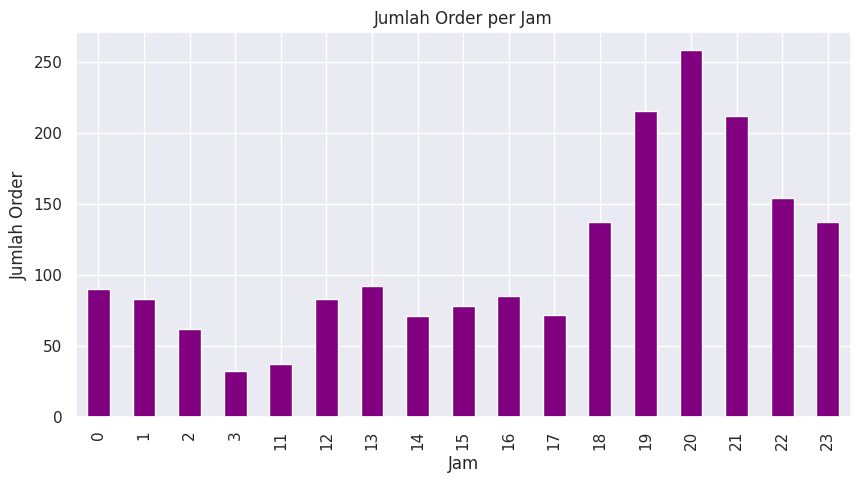

In [ ]:
#Create bar chart

df['hour'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Jumlah Order per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Order')
plt.show()

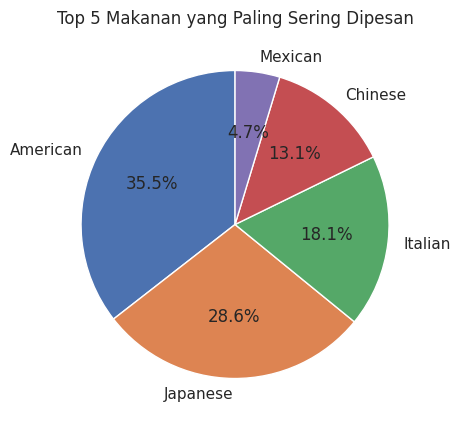

In [ ]:
#Create pie chart

df['cuisine_type'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Top 5 Makanan yang Paling Sering Dipesan")
plt.ylabel("")
plt.show()

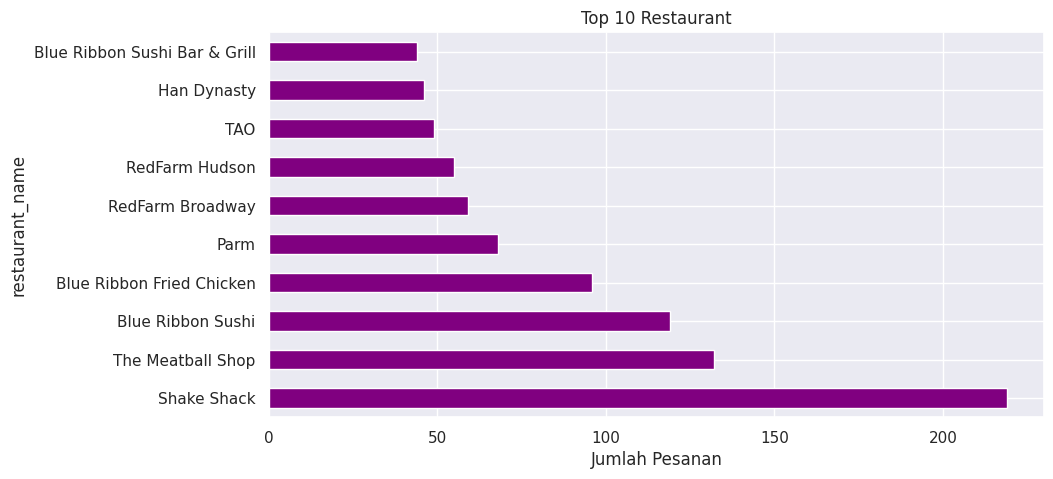

In [ ]:
#Create horizontal bar

df['restaurant_name'].value_counts().head(10).plot(kind='barh', color='purple')
plt.title("Top 10 Restaurant")
plt.xlabel("Jumlah Pesanan")
plt.show()

In [17]:
#Create simple insights

print("1. Puncak order terjadi di jam:", df['hour'].mode()[0])
print("2. Makanan paling populer:", df['cuisine_type'].mode()[0])
print("3. Lokasi terbanyak:", df['restaurant_name'].mode()[0])

1. Puncak order terjadi di jam: 20
2. Makanan paling populer: American
3. Lokasi terbanyak: Shake Shack
